<a href="https://colab.research.google.com/github/wcrowley342/tourdefancedata/blob/main/TourDeFranceData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rider Data Overview & Analysis



Source of the data: https://www.letour.fr/en/history

On its official website, the Tour de France lists riders’ results in its famed bicycle race since 1903. The site doesn’t provide downloads, but applied mathematician Thomas Camminady has scraped it to build a CSV file containing each finisher’s rank, time, team, and more.

## Import data

Import necessary libraries from python.  We'll use the pandas library for our data subset and manipulation operations and matplotlib for charting/graphing purposes


In [17]:
# Some basic, common libraries used:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
import plotly.express as px


Scrape data (download from site into HTML format). Clean up data and convert into readable CSV
https://github.com/camminady/LeTourDataSet/blob/master/main.ipynb

Read in data into "rider_df" data frame

In [2]:
# https://github.com/camminady/LeTourDataSet/blob/master/README.md

rider_df = pd.read_csv('https://raw.githubusercontent.com/camminady/LeTourDataSet/master/Riders.csv')

Inspect/visualize first 10 rows of data

In [3]:
rider_df.head()

,Unnamed: 0,Year,Rider,Rank,Time,DistanceKilometer,PersonalAvgPace,Hours,Minutes,Seconds,Team,RiderNumber,TotalSeconds,Gap,Bonus,Points,NumberStages,ListedAvgPace
0,0,1903,MAURICE GARIN,1,94h 33' 14'',2428.0,25.678,94.0,33.0,14.0,TDF 1903 ***,1,340394.0,-,NaN,NaN,6.0,25.679
1,1,1903,LUCIEN POTHIER,2,97h 32' 35'',2428.0,24.892,97.0,32.0,35.0,TDF 1903 ***,37,351155.0,+ 02h 59' 21'',NaN,NaN,6.0,25.679
2,2,1903,FERNAND AUGEREAU,3,99h 02' 38'',2428.0,24.514,99.0,2.0,38.0,TDF 1903 ***,39,356558.0,+ 04h 29' 24'',NaN,NaN,6.0,25.679
3,3,1903,RODOLPHE MULLER,4,99h 12' 44'',2428.0,24.473,99.0,12.0,44.0,TDF 1903 ***,33,357164.0,+ 04h 39' 30'',NaN,NaN,6.0,25.679
4,4,1903,JEAN-BAPTISTE FISCHER,5,99h 41' 58'',2428.0,24.353,99.0,41.0,58.0,TDF 1903 ***,12,358918.0,+ 05h 08' 44'',NaN,NaN,6.0,25.679


Get the "shape" of the data frame (number of rows & columns)

In [ ]:
print(rider_df.shape)

(9452, 18)


# Clean Data

Replace any NaN / empty rows

In [ ]:
#rider_df.fillna(0, inplace=True)

Drop first column, which is unnecessary

In [44]:
rider_df = df.iloc[: , 1:]

rider_df.head()


,Year,Rider,Rank,Time,DistanceKilometer,PersonalAvgPace,Hours,Minutes,Seconds,Team,RiderNumber,TotalSeconds,Gap,Bonus,Points,NumberStages,ListedAvgPace
0,1903,MAURICE GARIN,1,94h 33' 14'',2428.0,25.678,94.0,33.0,14.0,TDF 1903 ***,1,340394.0,-,NaN,NaN,6.0,25.679
1,1903,LUCIEN POTHIER,2,97h 32' 35'',2428.0,24.892,97.0,32.0,35.0,TDF 1903 ***,37,351155.0,+ 02h 59' 21'',NaN,NaN,6.0,25.679
2,1903,FERNAND AUGEREAU,3,99h 02' 38'',2428.0,24.514,99.0,2.0,38.0,TDF 1903 ***,39,356558.0,+ 04h 29' 24'',NaN,NaN,6.0,25.679
3,1903,RODOLPHE MULLER,4,99h 12' 44'',2428.0,24.473,99.0,12.0,44.0,TDF 1903 ***,33,357164.0,+ 04h 39' 30'',NaN,NaN,6.0,25.679
4,1903,JEAN-BAPTISTE FISCHER,5,99h 41' 58'',2428.0,24.353,99.0,41.0,58.0,TDF 1903 ***,12,358918.0,+ 05h 08' 44'',NaN,NaN,6.0,25.679


# Exploratory Data Analysis (EDA)

At the beginning of a data analysis we'll want to explore any possible relationships and other insights we can learn from the data. 

In [4]:
rider_df.describe()

,Unnamed: 0,Year,Rank,DistanceKilometer,PersonalAvgPace,Hours,Minutes,Seconds,RiderNumber,TotalSeconds,Points,NumberStages,ListedAvgPace
count,9452.000000,9452.000000,9452.000000,9452.000000,9255.000,9255.000000,9255.000000,9255.000000,9452.000000,9.255000e+03,197.000000,9452.000000,9151.000000
mean,4725.500000,1981.128862,57.569086,3966.960643,inf,109.949109,29.063425,29.193625,89.031845,3.975898e+05,325.182741,21.352730,36.589313
std,2728.701706,29.744678,41.113251,572.318961,NaN,38.219958,17.466952,17.526999,60.261518,1.376514e+05,166.116559,2.311157,4.255119
min,0.000000,1903.000000,1.000000,2428.000000,12.351,0.000000,0.000000,0.000000,1.000000,0.000000e+00,37.000000,6.000000,24.056000
25%,2362.750000,1962.000000,23.000000,3525.000000,34.830,89.000000,14.000000,14.000000,36.000000,3.226100e+05,175.000000,21.000000,34.906000
50%,4725.500000,1988.000000,49.000000,3846.000000,37.668,98.000000,29.000000,29.000000,83.000000,3.530660e+05,327.000000,21.000000,38.059000
75%,7088.250000,2005.000000,86.000000,4274.000000,39.110,119.000000,44.000000,45.000000,133.000000,4.288855e+05,479.000000,23.000000,39.788000
max,9451.000000,2020.000000,174.000000,5745.000000,inf,299.000000,59.000000,59.000000,321.000000,1.078413e+06,596.000000,26.000000,41.654000


# Graphs & Visual Analysis

Create the columns needed for the visualization

In [5]:
year = np.unique(rider_df["Year"])
distance = rider_df.groupby("Year").agg("mean")["DistanceKilometer"].values
winnerpace = rider_df.groupby("Year").first()["PersonalAvgPace"]
winner = rider_df.groupby("Year").first()["Rider"]
meantime = rider_df.groupby("Year").agg("mean")["TotalSeconds"]
meanpace = distance/meantime*3600

**Simple time series graph of the winners avg pace each year**

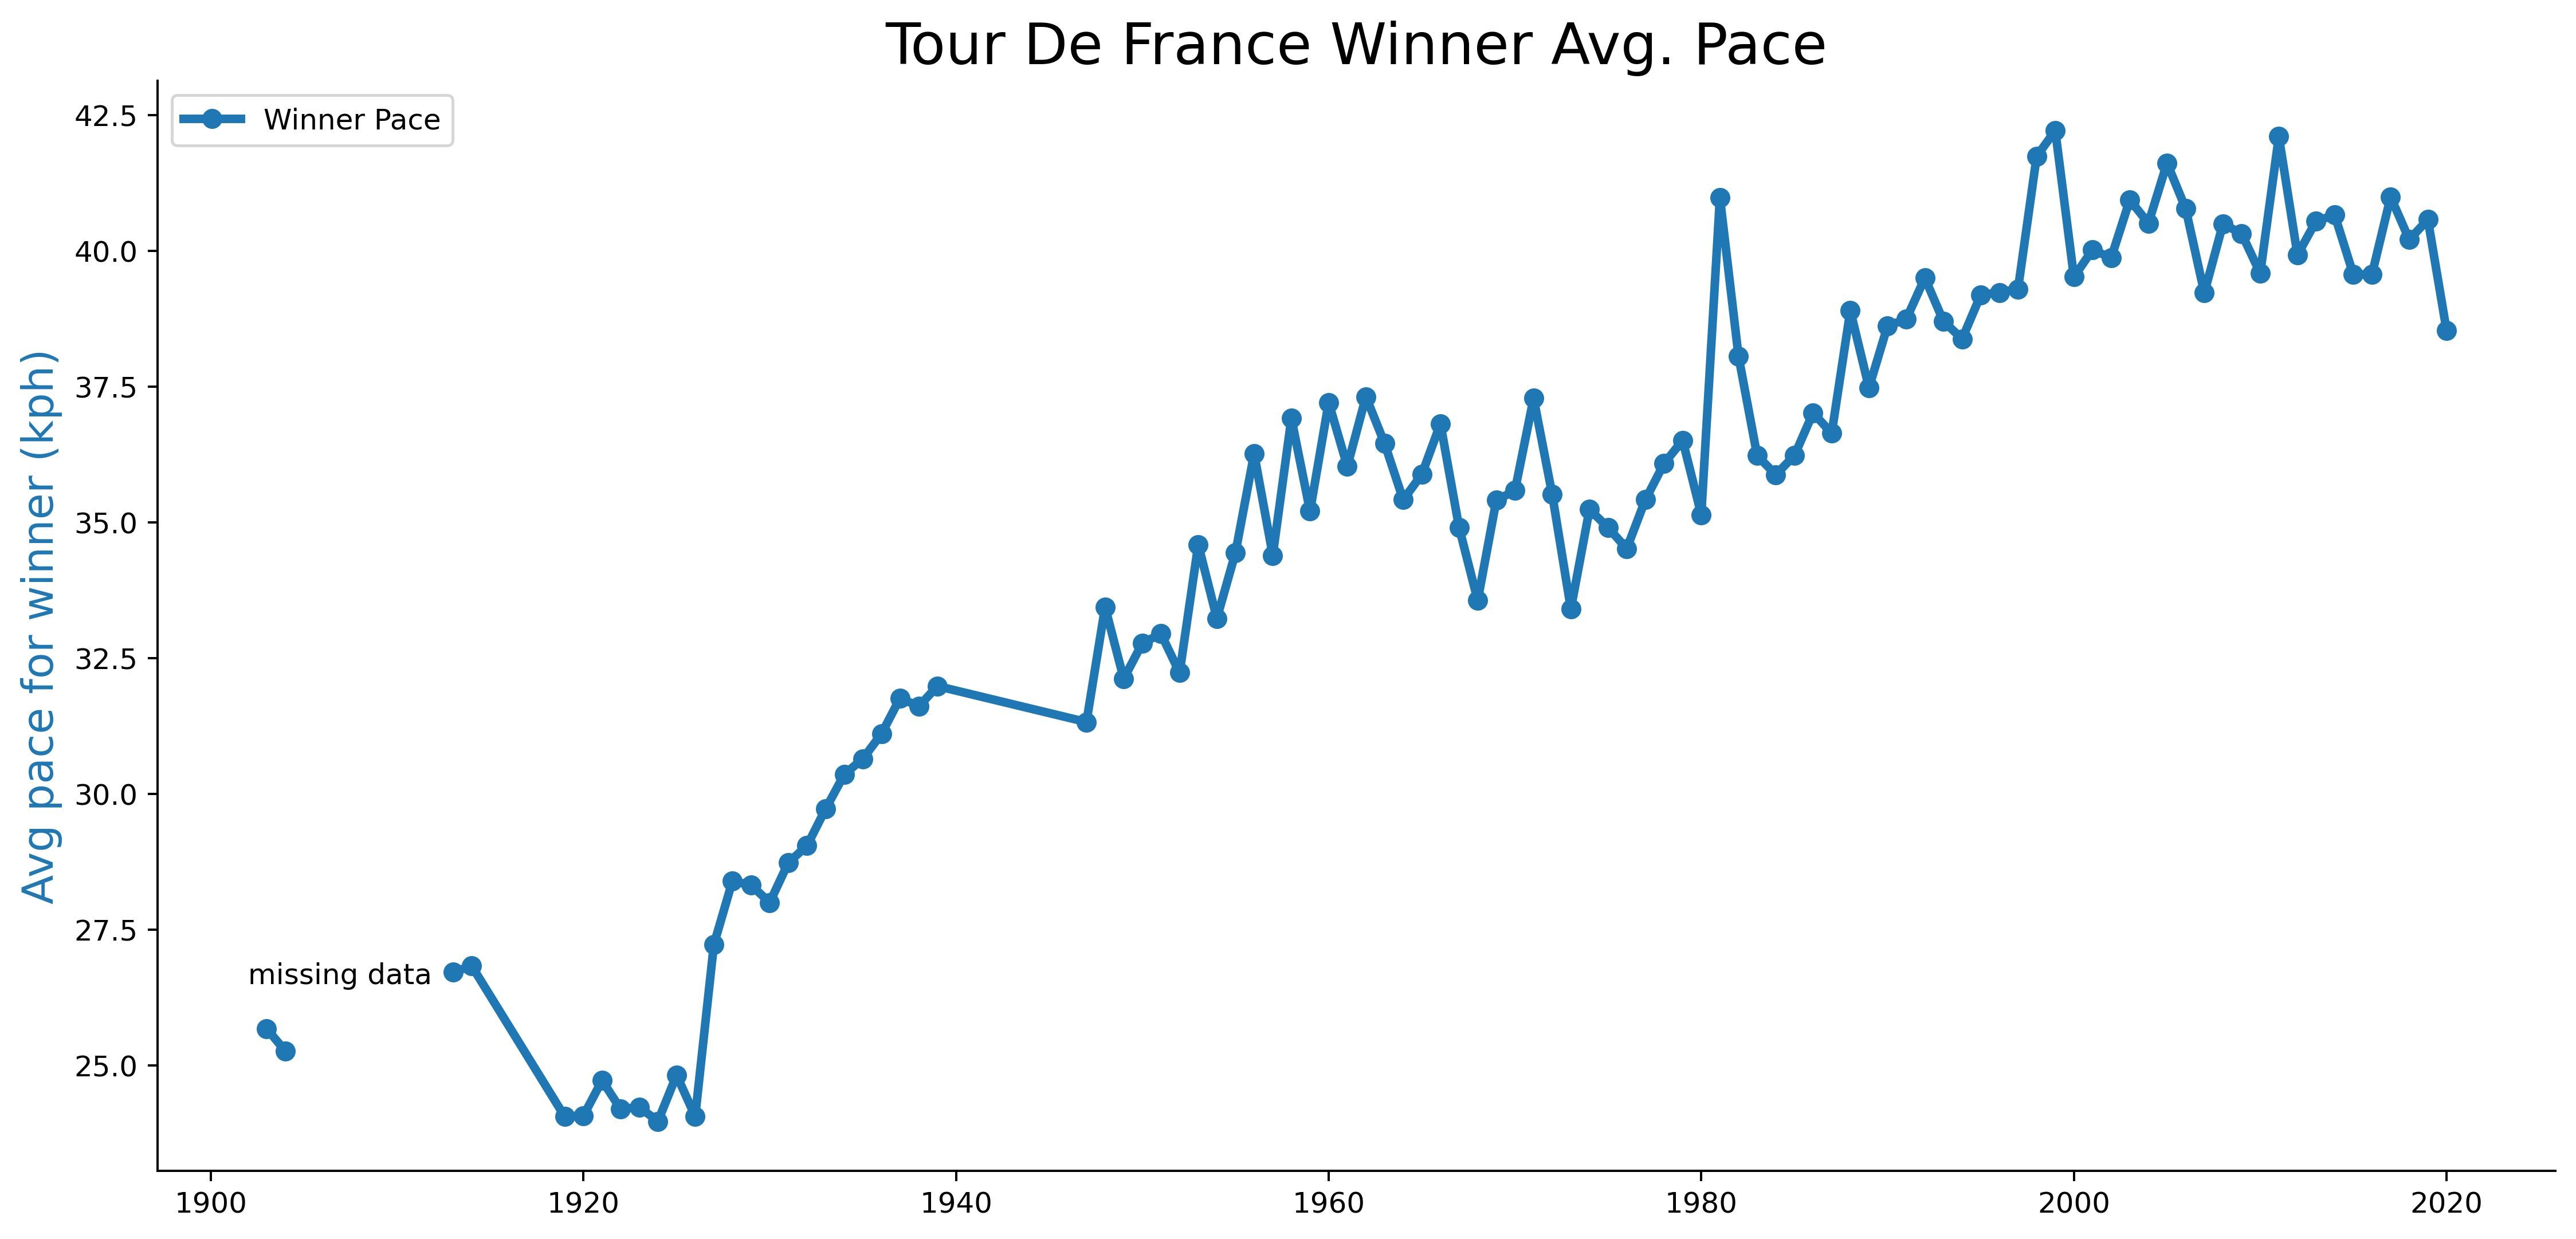

In [48]:

#1st line (winner pace)
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,winnerpace, "-o",lw=3, label = 'Winner Pace')
ax.set_ylabel("Avg pace for winner (kph)",fontsize = 15, color= "tab:blue")
ax.set_title('Tour De France Winner Avg. Pace', fontsize = 20)
ax.legend(loc='upper left')
plt.rcParams['figure.dpi'] = 360
sns.despine()

#2nd line trendline
#https://dzone.com/articles/python-how-to-add-trend-line-to-line-chartgraph 

#z = numpy.polyfit(year, winnerpace, 1)
#p = numpy.poly1d(z)
#pylab.plot(year,p(year))
#print “winnerpace =%.6fx+(%.6f)”%(z[0],z[1])

z = np.polyfit(year, winnerpace, 1)
p = np.poly1d(z)
#ax2.plot(year,p(year),"r--")

#add annotation

ax.text(1902.000000, 26.5, "missing data")


fig.show()

**Time series scatterplot (with trendline)**

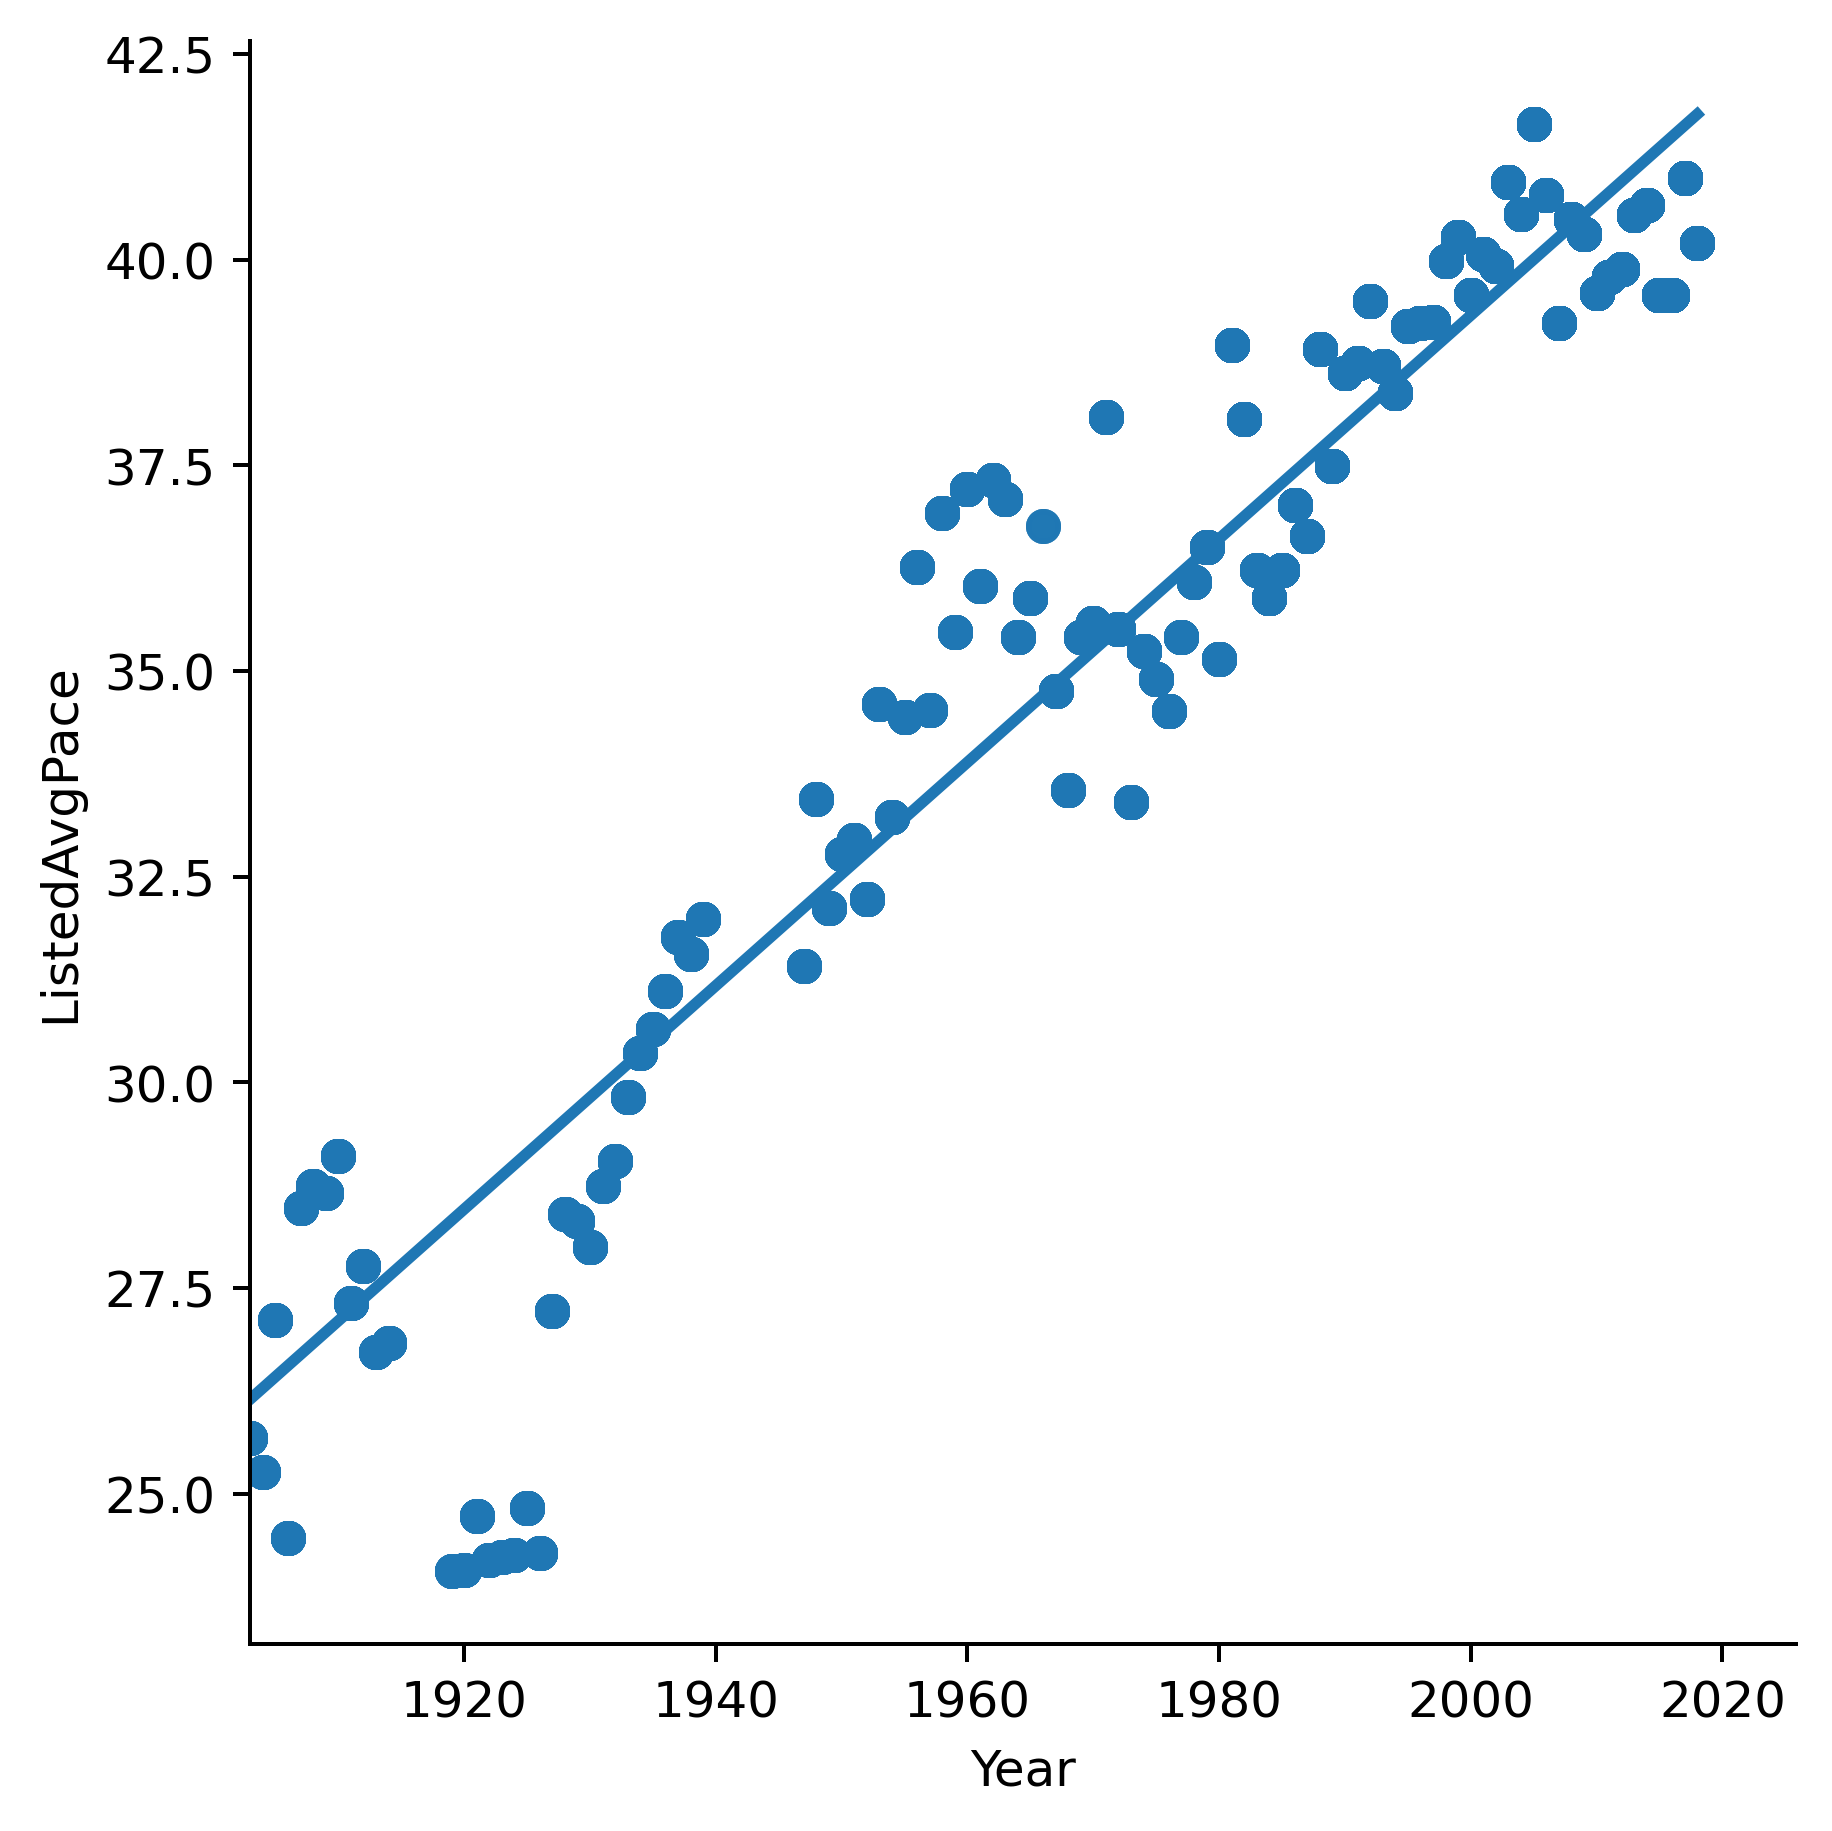

In [7]:
df = rider_df

_ = sns.lmplot(x='Year', y='ListedAvgPace', data=df, ci=None)

**Comparing Distance to Pace over time** (multiple axes on a single plot)

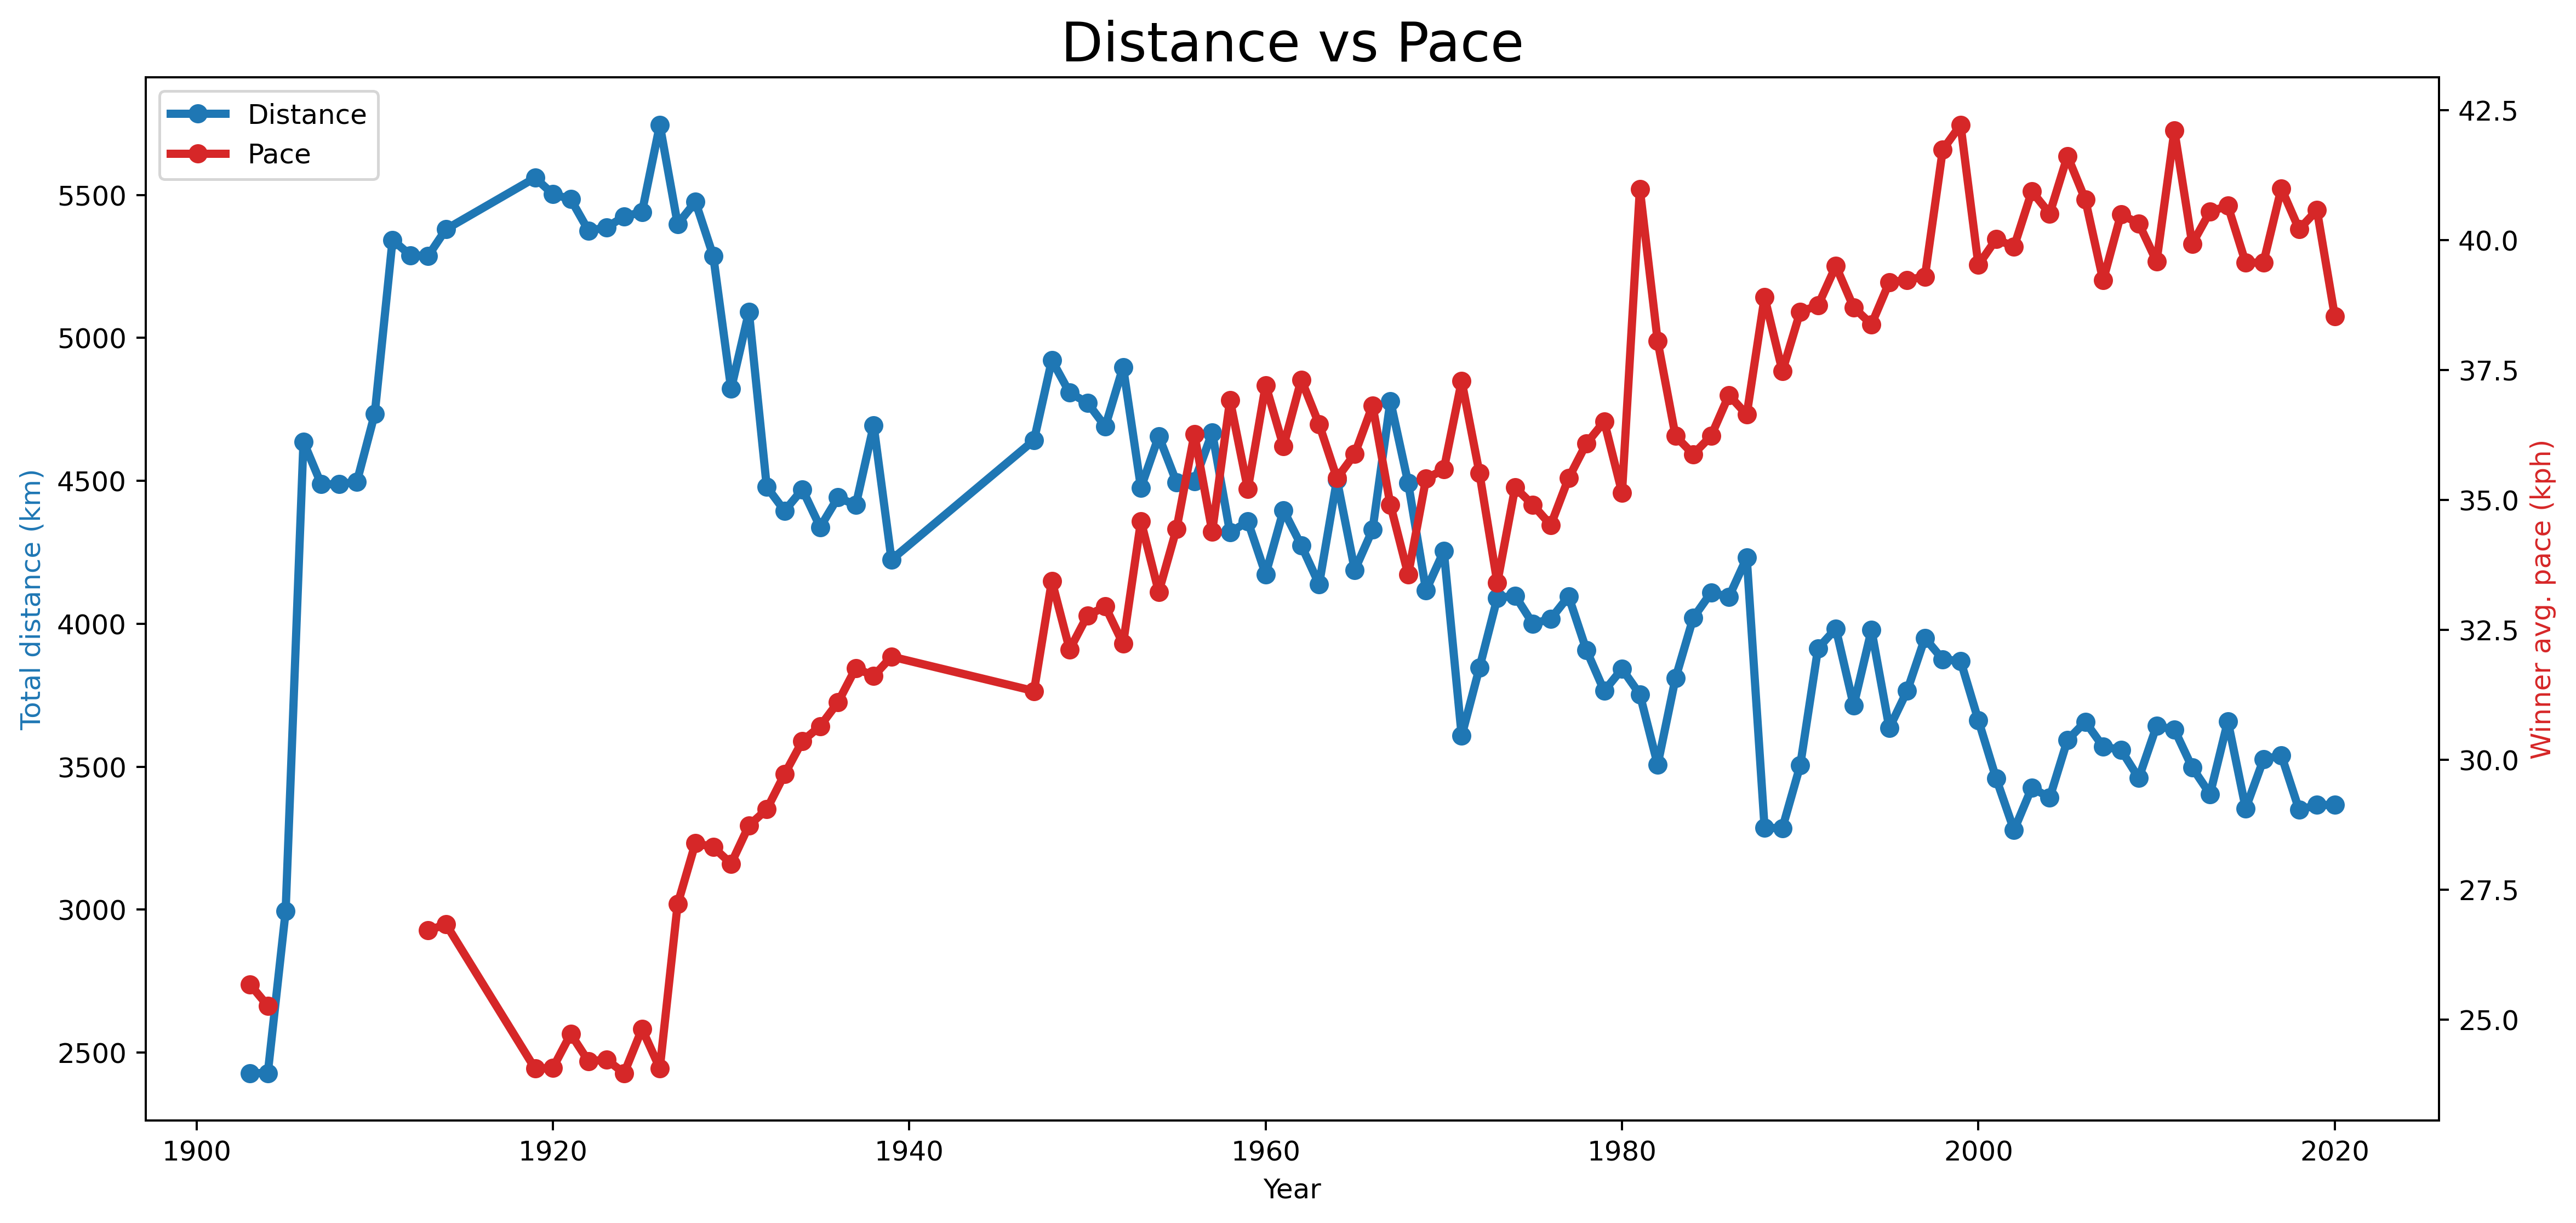

In [54]:
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,distance,"-o", lw = 3, label='Distance')
ax.set_ylabel("Total distance (km)",fontsize = 10,color = "tab:blue")

ax2 = ax.twinx()
ax2.plot(year,winnerpace,"-o",color = "tab:red",lw = 3,label='Pace')
ax2.set_ylabel("Winner avg. pace (kph)",fontsize = 10,color = "tab:red")
ax.set_xlabel("Year",fontsize=10)
#ax.grid("on")
ax.set_title("Distance vs Pace",fontsize=20)

#handling of label consolidation
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left');


Graph future predictions

In [10]:
import fbprophet
# Prophet requires columns ds (Date) and y (value)
#rider_df = rider_df.rename(columns={year: 'ds', winnerpace: 'y'})

# Make the prophet model and fit on the data
#gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
#gm_prophet.fit(rider_df)

Add in an annotation / hovermode

https://plotly.com/python/hover-text-and-formatting/

In [13]:
fig = px.line(rider_df, x="Year", y="ListedAvgPace", title="layout.hovermode='closest' (the default)")

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
          )
)


fig.show()

# Next Steps / Future Analysis 

Some other things I'd like to add or try to this project:


*   Add in the country of the winner each year (flags/country codes/etc)
*   Create hover state of each winner for the year in the above charts
*   Color or highlight certain points in the winners chart for callouts





**Graph with highlighted points (Chris Froome victories)**
---
build an array with Froome as winner? Plot specific points?





In [ ]:
#df2 = rider_df.query('year >=2014')
df2 = rider_df.query(year == 2014) # https://cmdlinetips.com/2019/11/how-to-highlight-data-points-with-colors-and-text-in-python/

ValueError: ignored

attempt # 2

ValueError: ignored

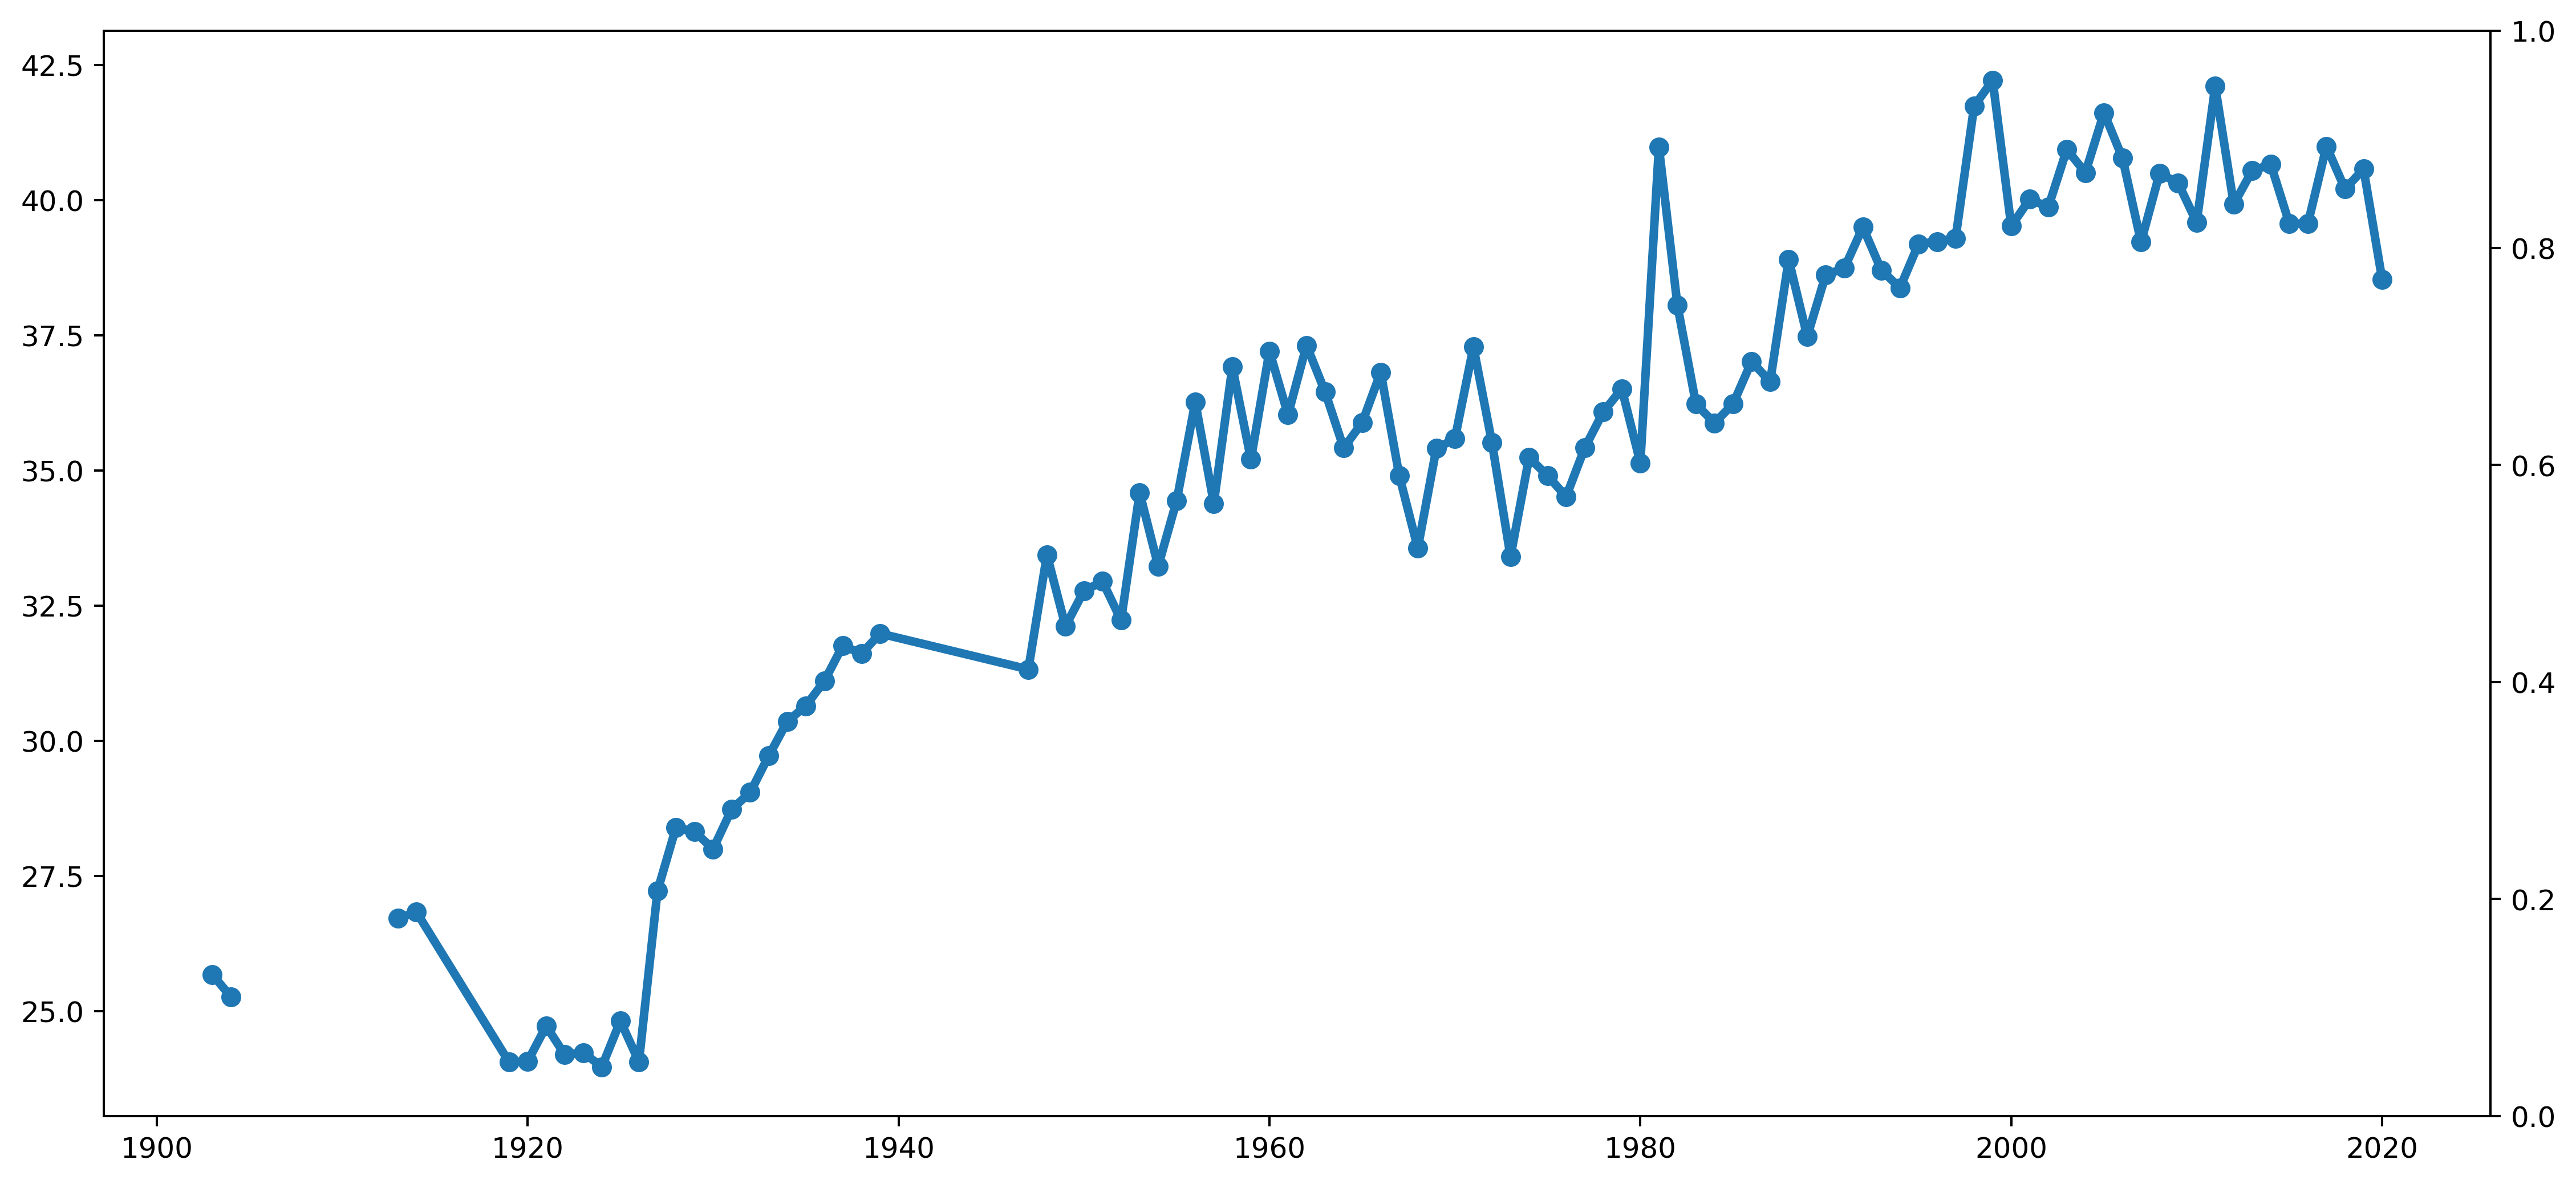

In [ ]:
#https://stackoverflow.com/questions/38512485/highlight-specific-points-in-matplotlib-scatterplot

#x = rider_df["Year"]
#y = rider_df["Rider"]
#plt.scatter(x,y)

#x = 'year'
#y = 'winnerpace'
#plt.scatter(x,y)


fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,winnerpace, "-o",lw=3)
ax2 = ax.twinx()
#ax2.plot(2013,40.542, color="y",lw=5)  - ran but didn't show up....
#ax2.plot(rider_df["ListedAvgPace"][df['Year']==2013], 2013, color="y")  ran but didn't show up....      

attempt # 3

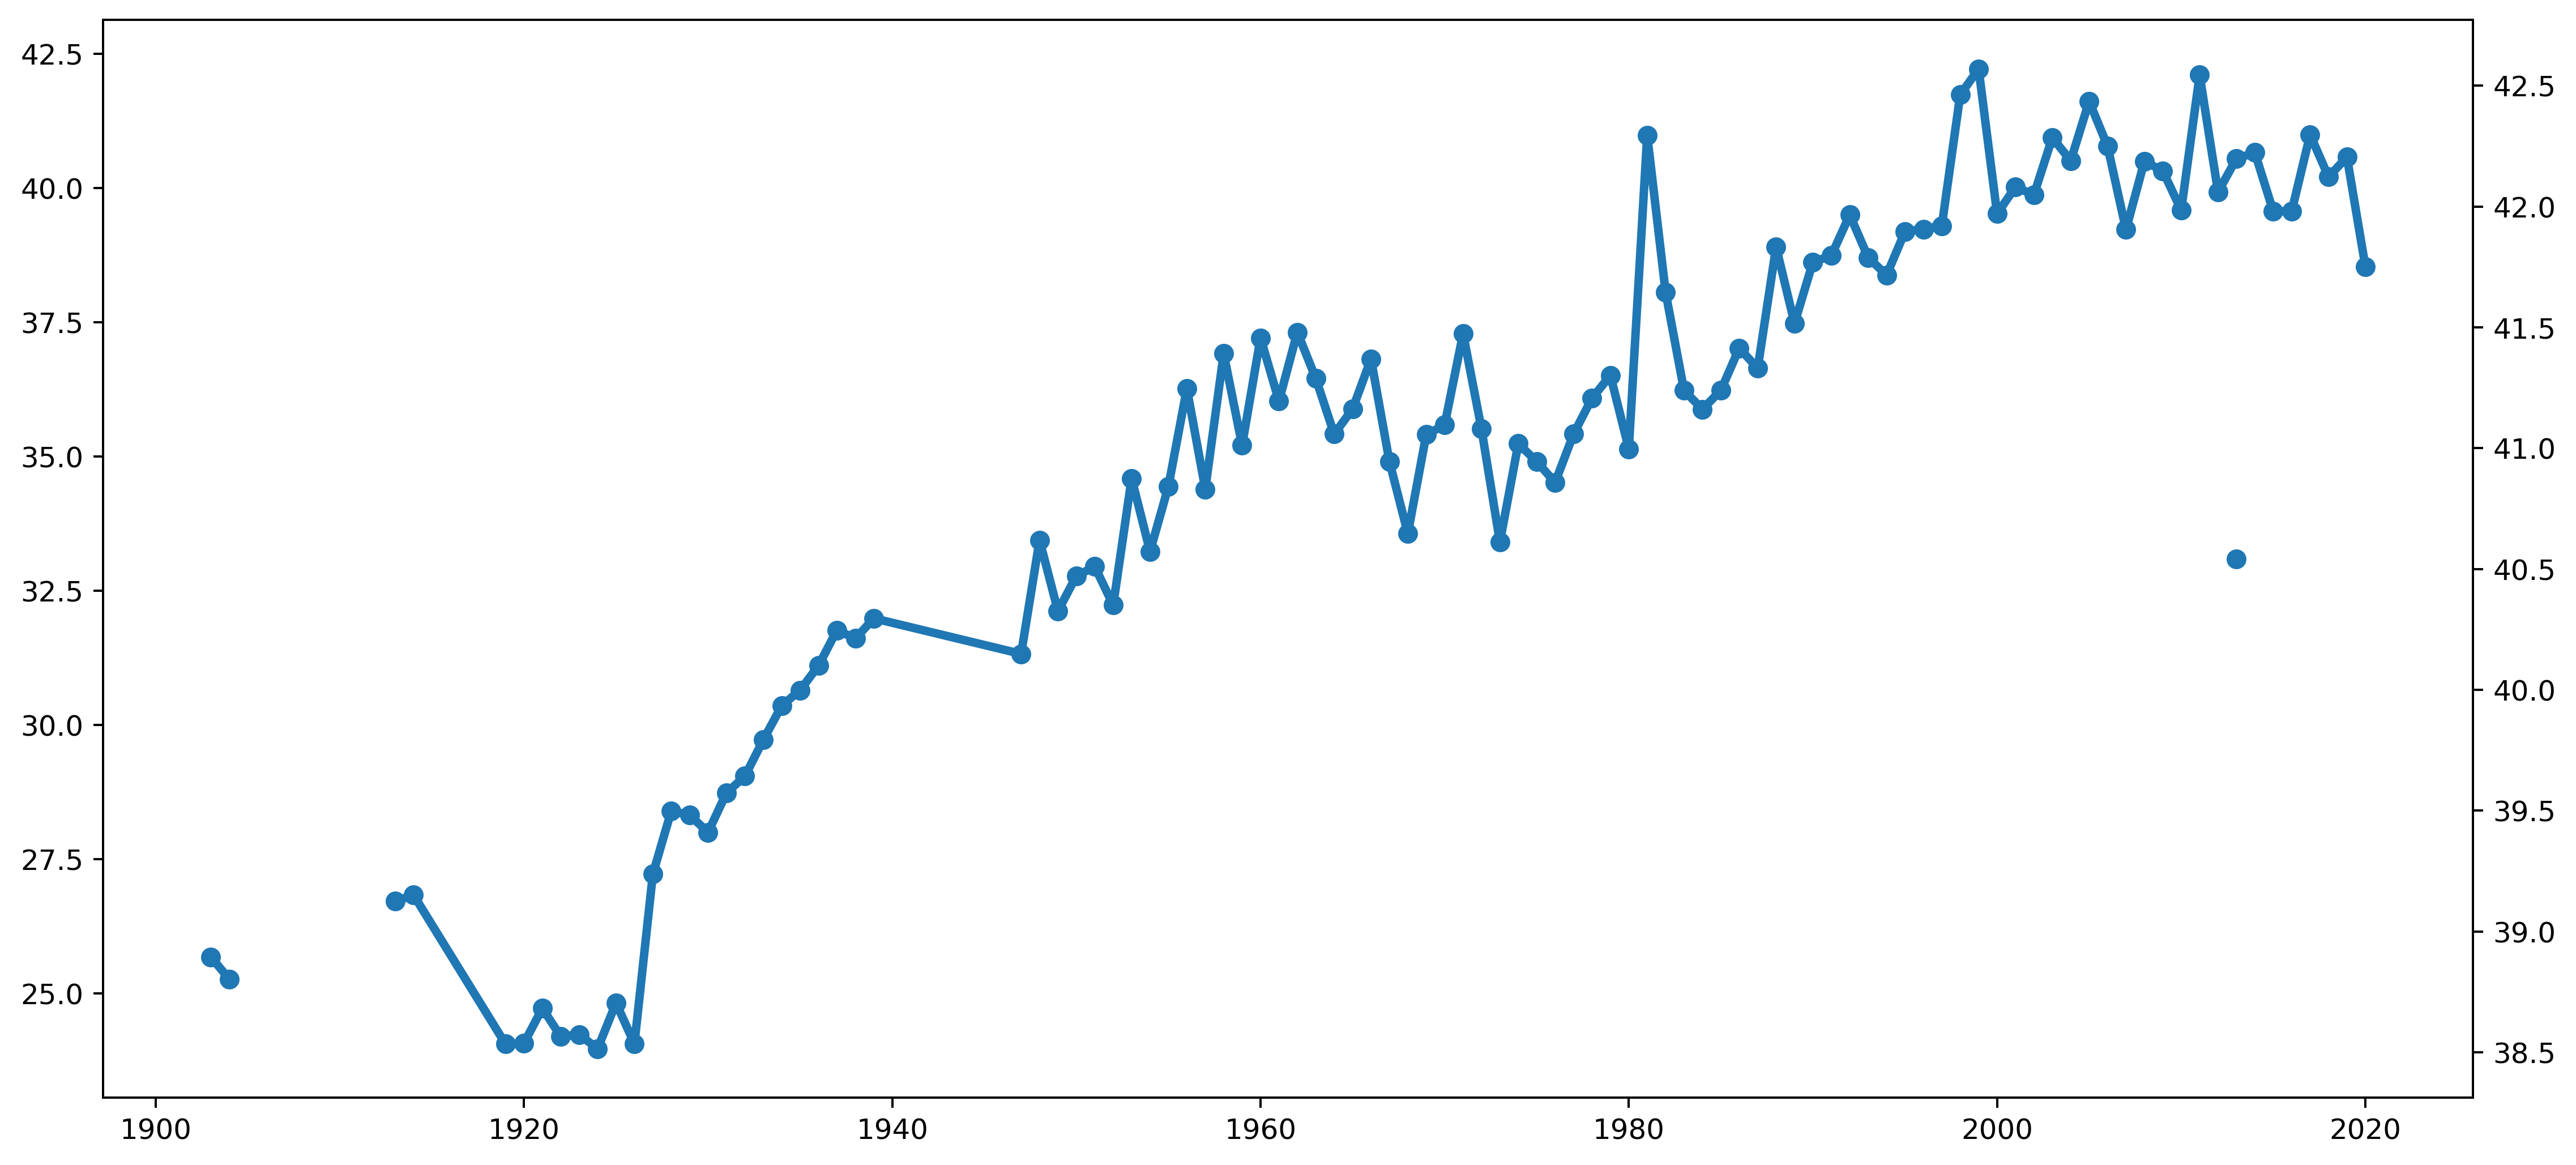

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,winnerpace, "-o",lw=3)
ax2 = ax.twinx()
#ax2.plot(2013,40.542, color="y",lw=5)  - ran but didn't show up....

#ax2.plot(x[2014], y[40.542], "y", lw=3)
plt.plot(2013,40.542, "-o", lw=5)
fig.show()

attempt # 4

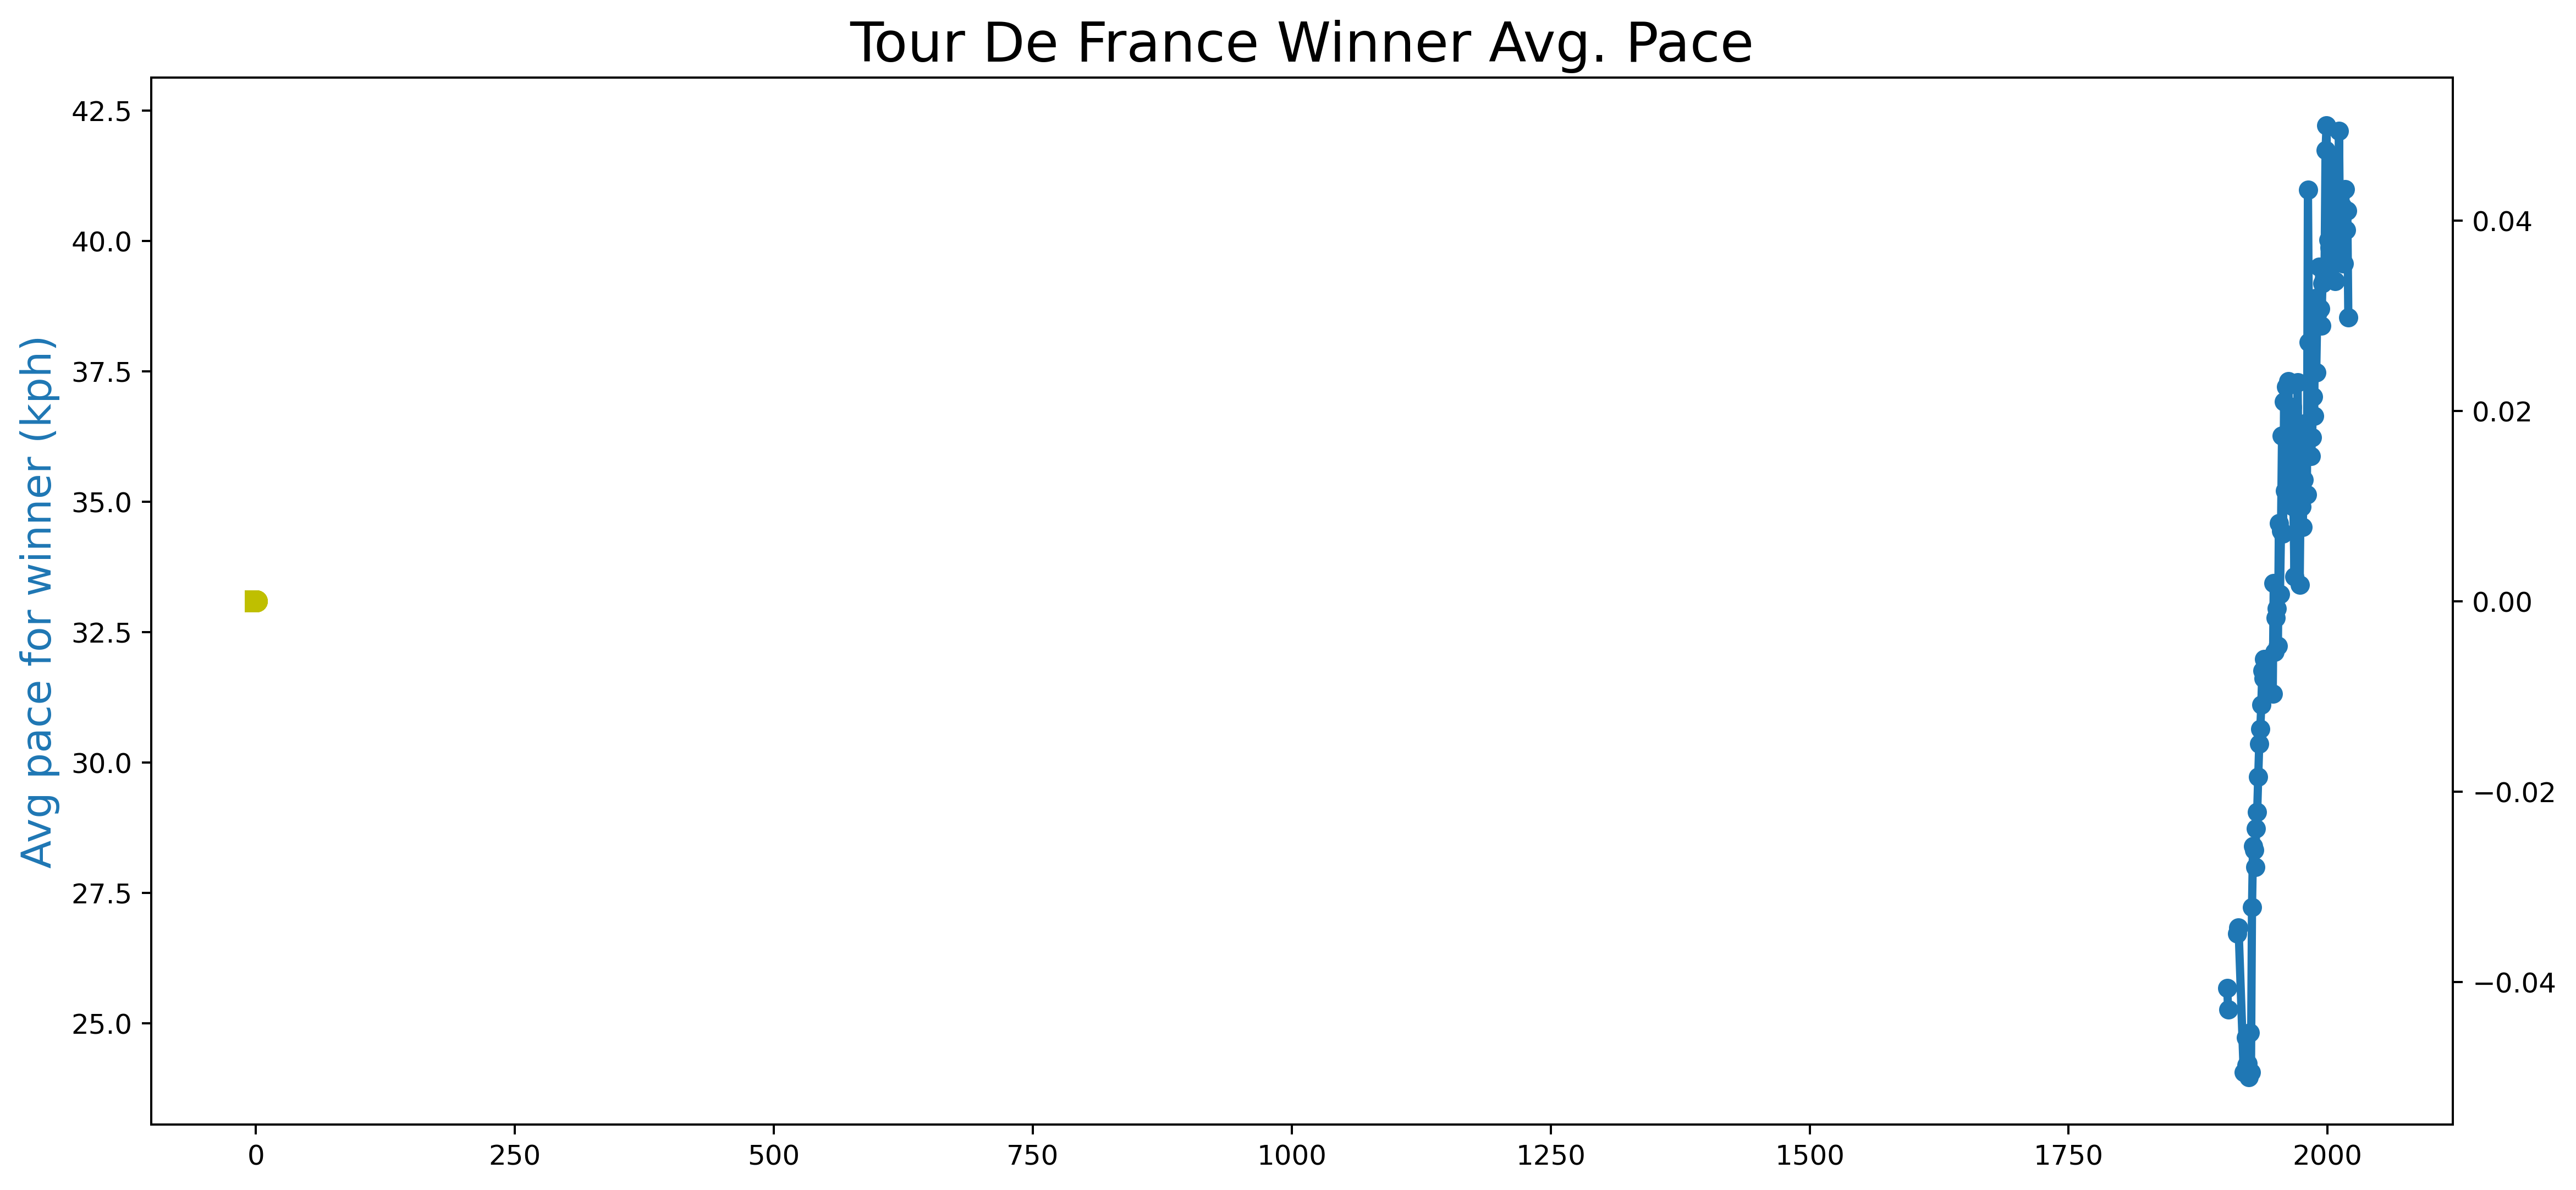

In [ ]:

#1st line (winner pace)
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,winnerpace, "-o",lw=3)
ax.set_ylabel("Avg pace for winner (kph)",fontsize = 15, color= "tab:blue")
ax.set_title('Tour De France Winner Avg. Pace', fontsize = 20)
plt.rcParams['figure.dpi'] = 360
sns.despine()

ax2 = ax.twinx()
ax2.plot(year==2013,winnerpace==40.542, "y", lw=8)
fig.show()

attempt #5

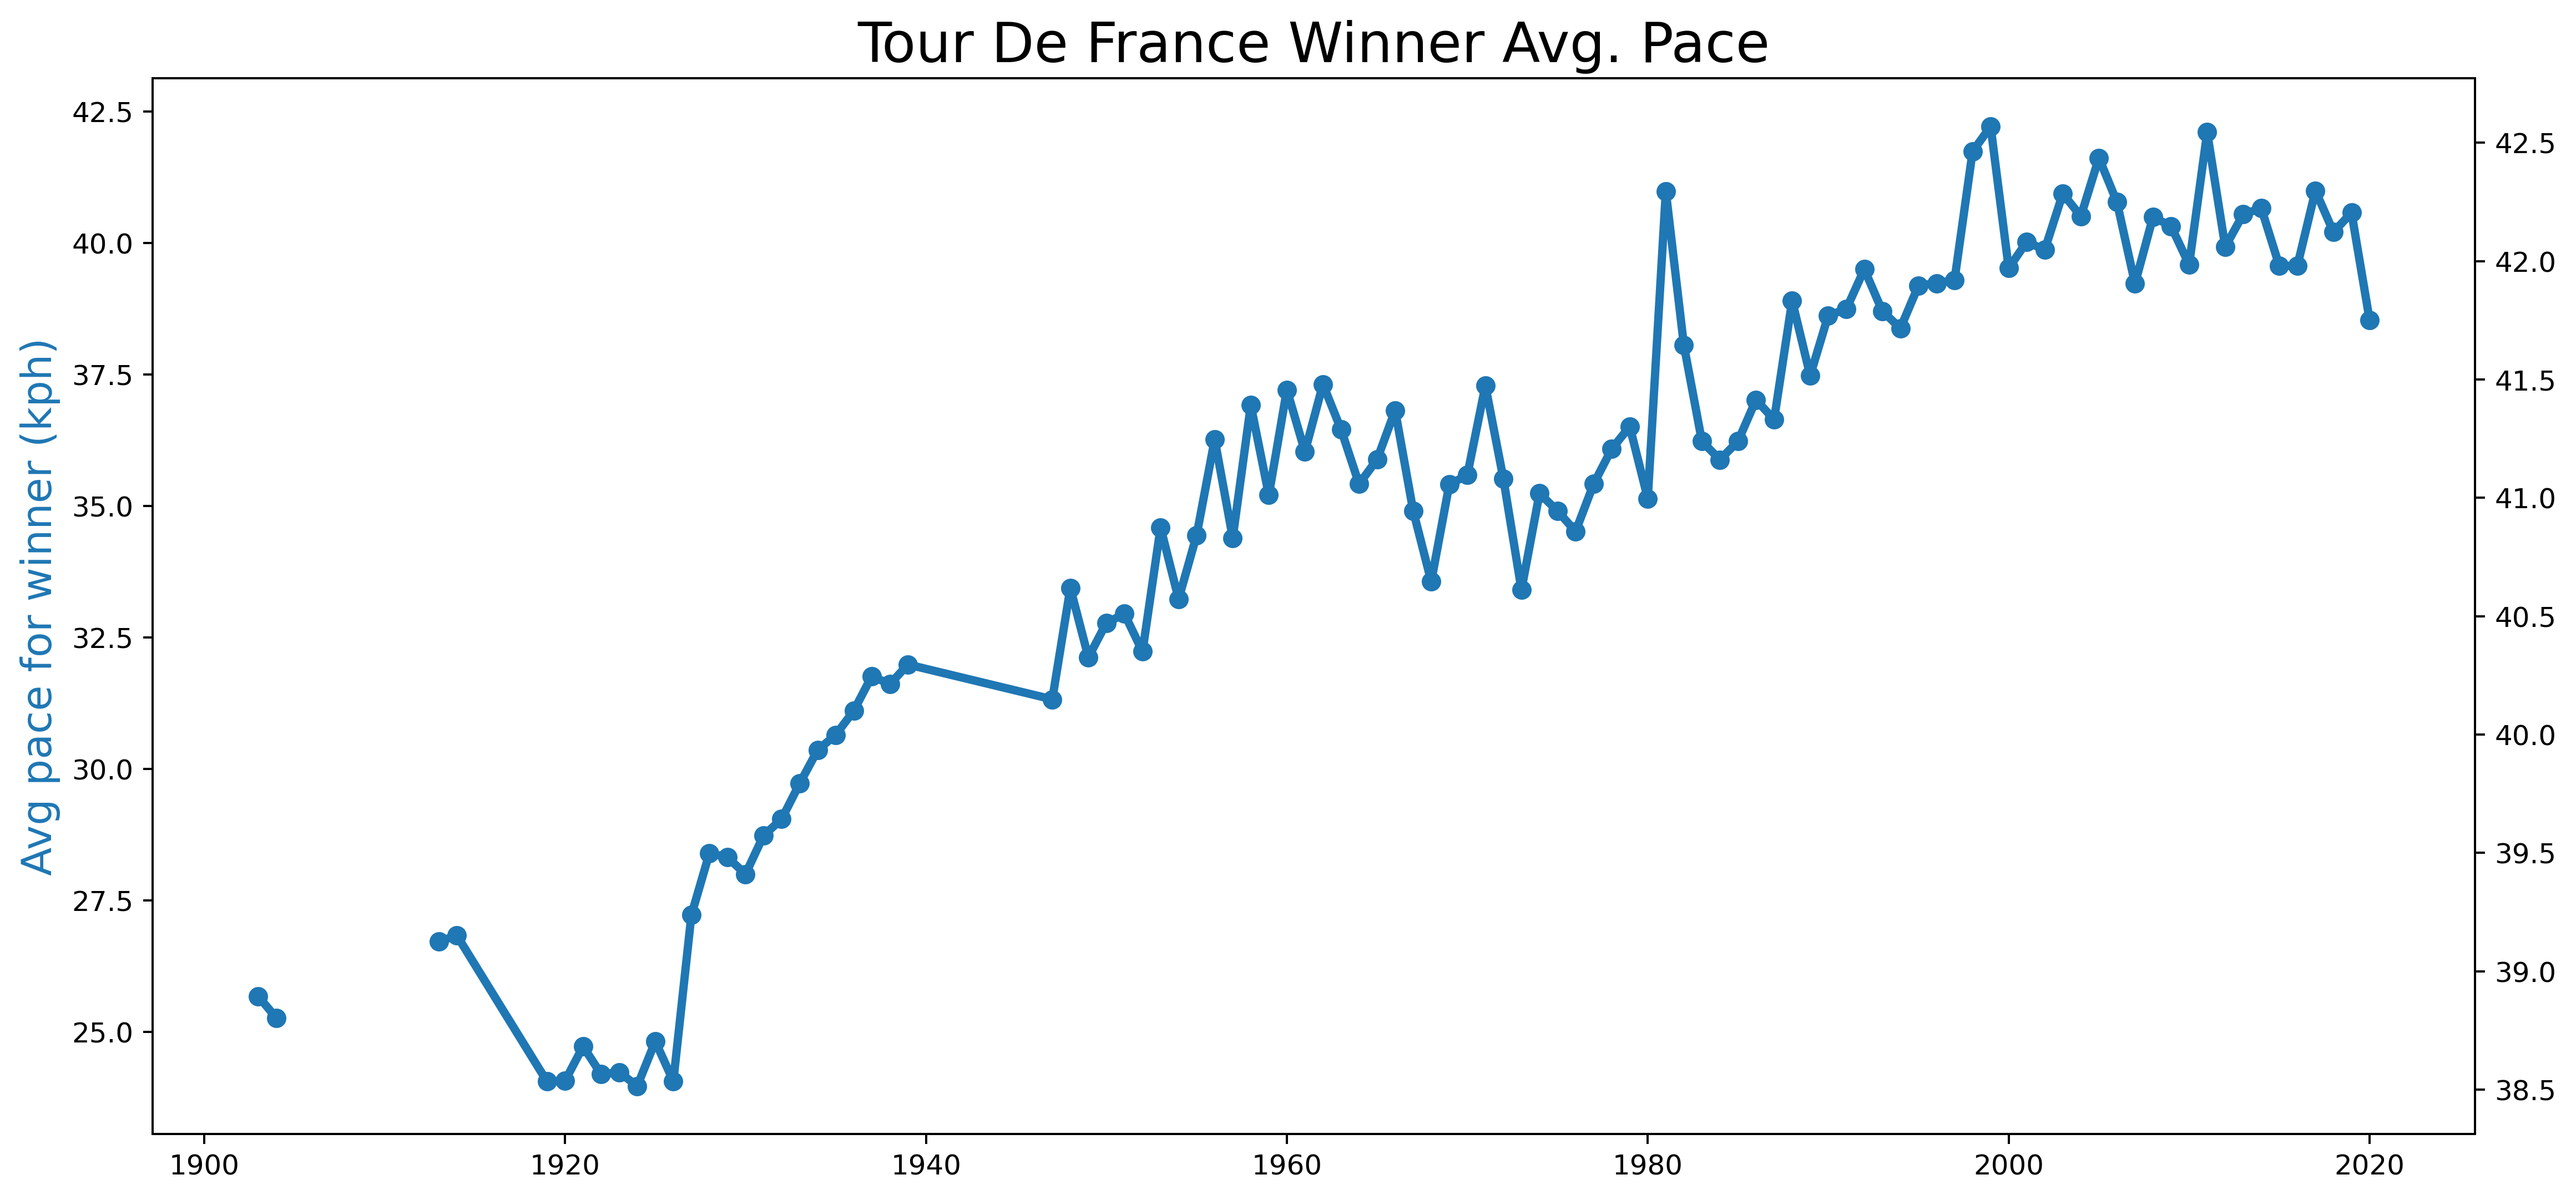

In [ ]:
#1st line (winner pace)
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,winnerpace, "-o",lw=3)
ax.set_ylabel("Avg pace for winner (kph)",fontsize = 15, color= "tab:blue")
ax.set_title('Tour De France Winner Avg. Pace', fontsize = 20)
plt.rcParams['figure.dpi'] = 360
sns.despine()

ax2 = ax.twinx()
ax2.plot(2013, 40.542, "y", lw=8)
fig.show()

attempt#6

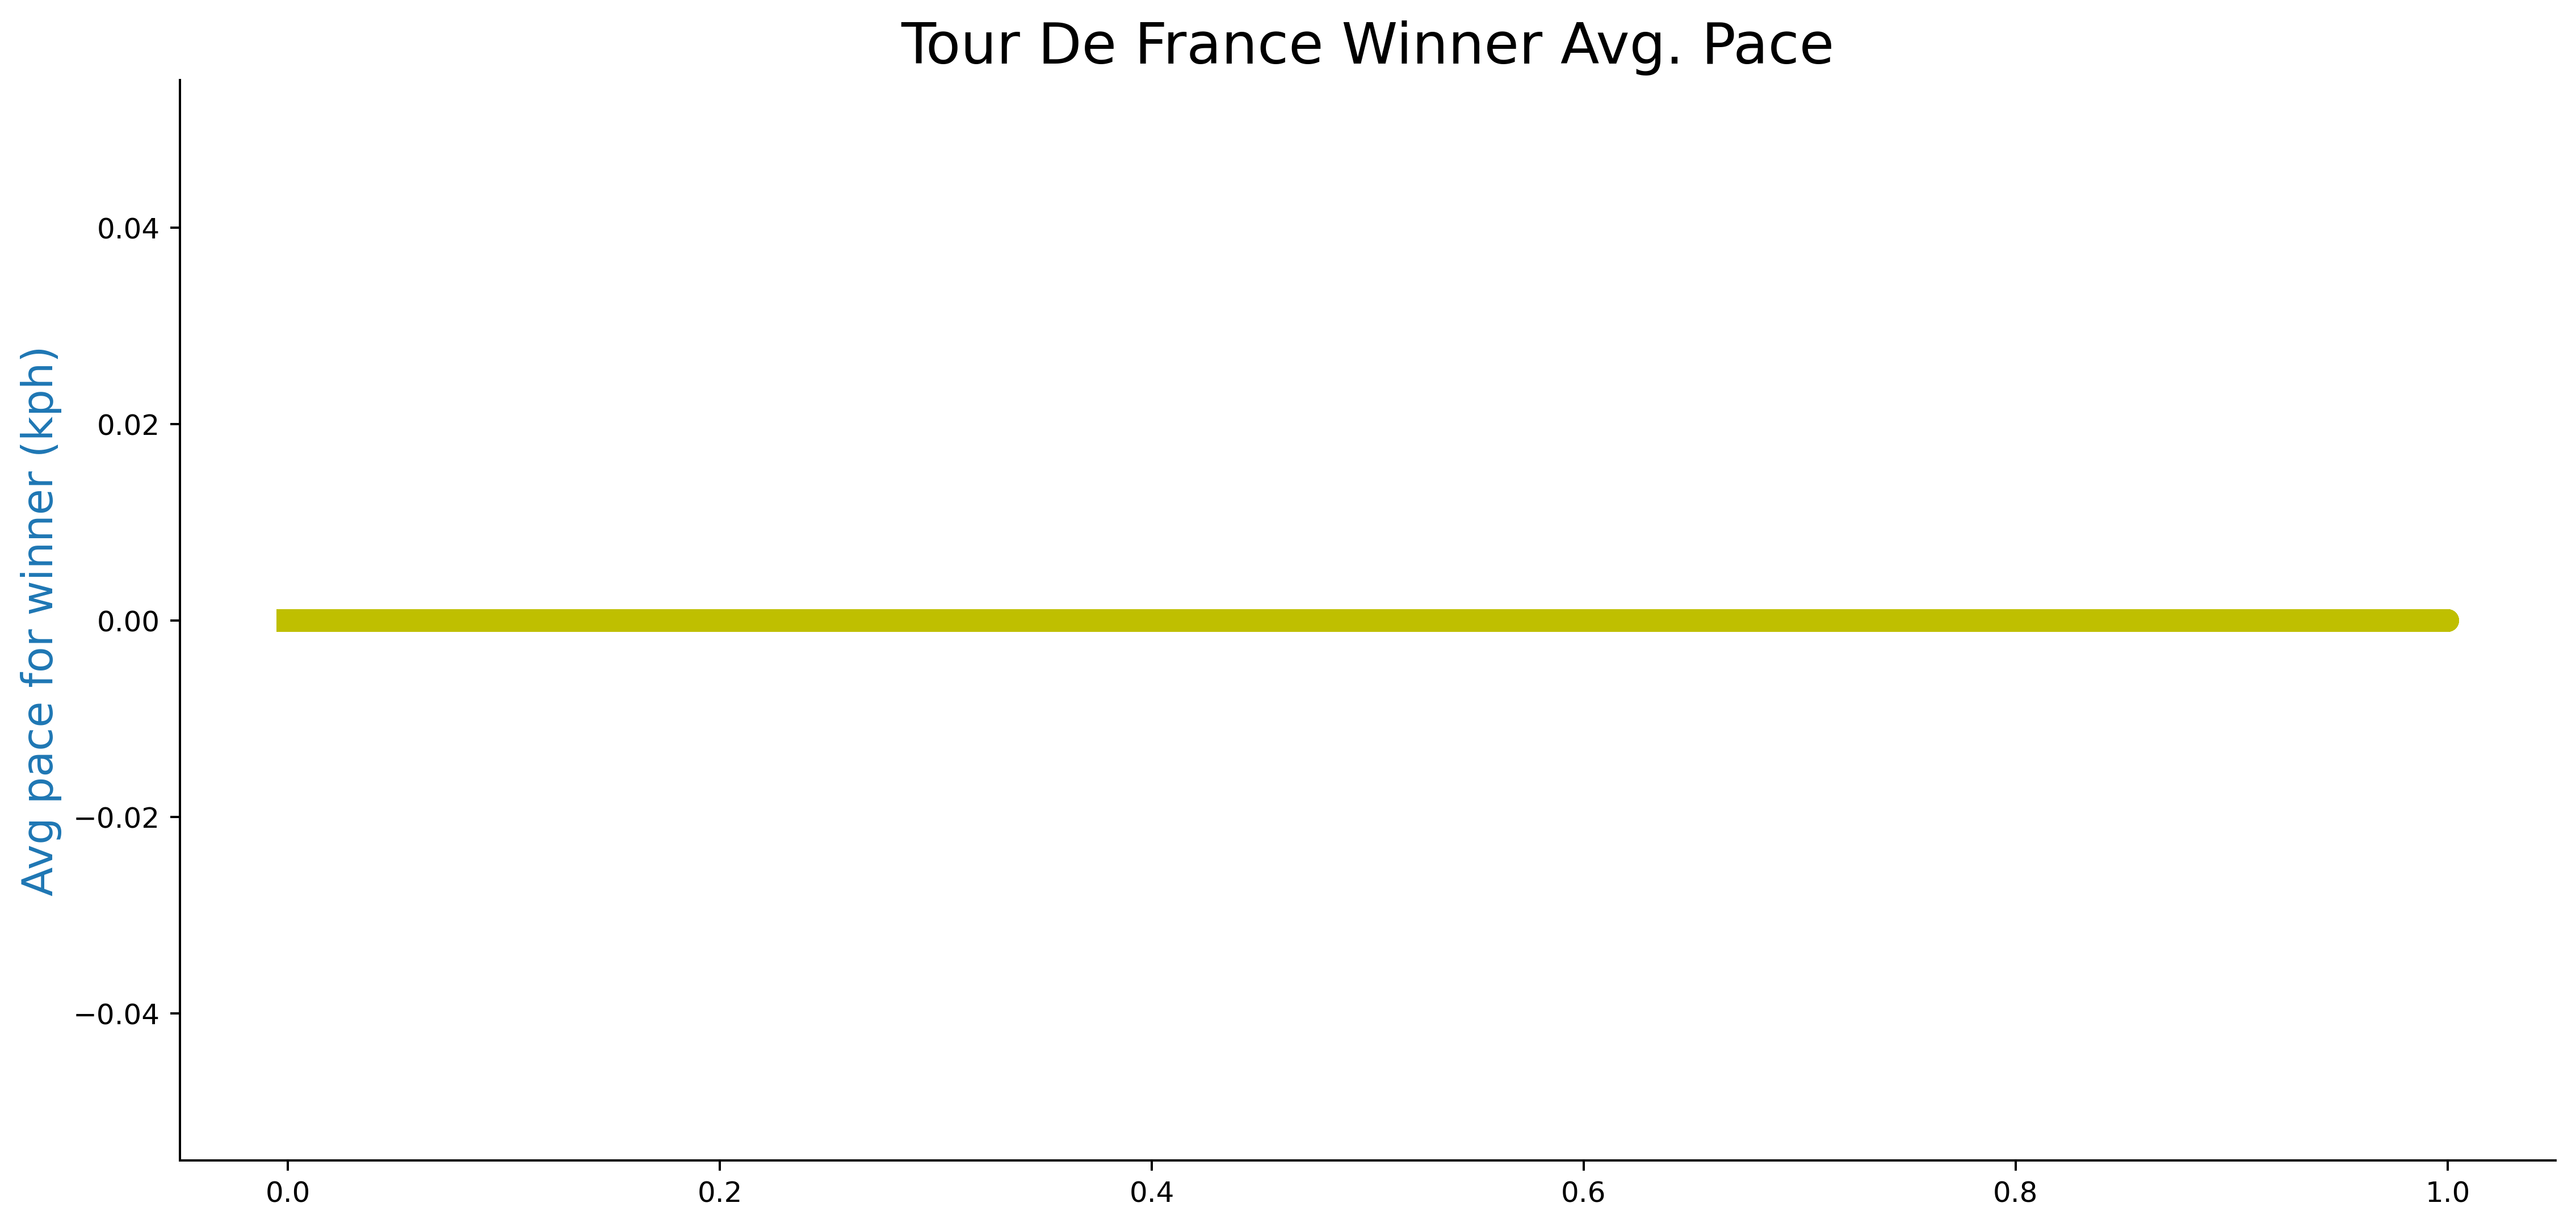

In [ ]:
#1st line (winner pace)
fig,ax = plt.subplots(1,1,figsize=(15,7))
#ax.plot(2013, 40.542, "y", lw=8)
ax.plot(year==2013,winnerpace==40.542, "y", lw =8)
ax.set_ylabel("Avg pace for winner (kph)",fontsize = 15, color= "tab:blue")
ax.set_title('Tour De France Winner Avg. Pace', fontsize = 20)
plt.rcParams['figure.dpi'] = 360
sns.despine()

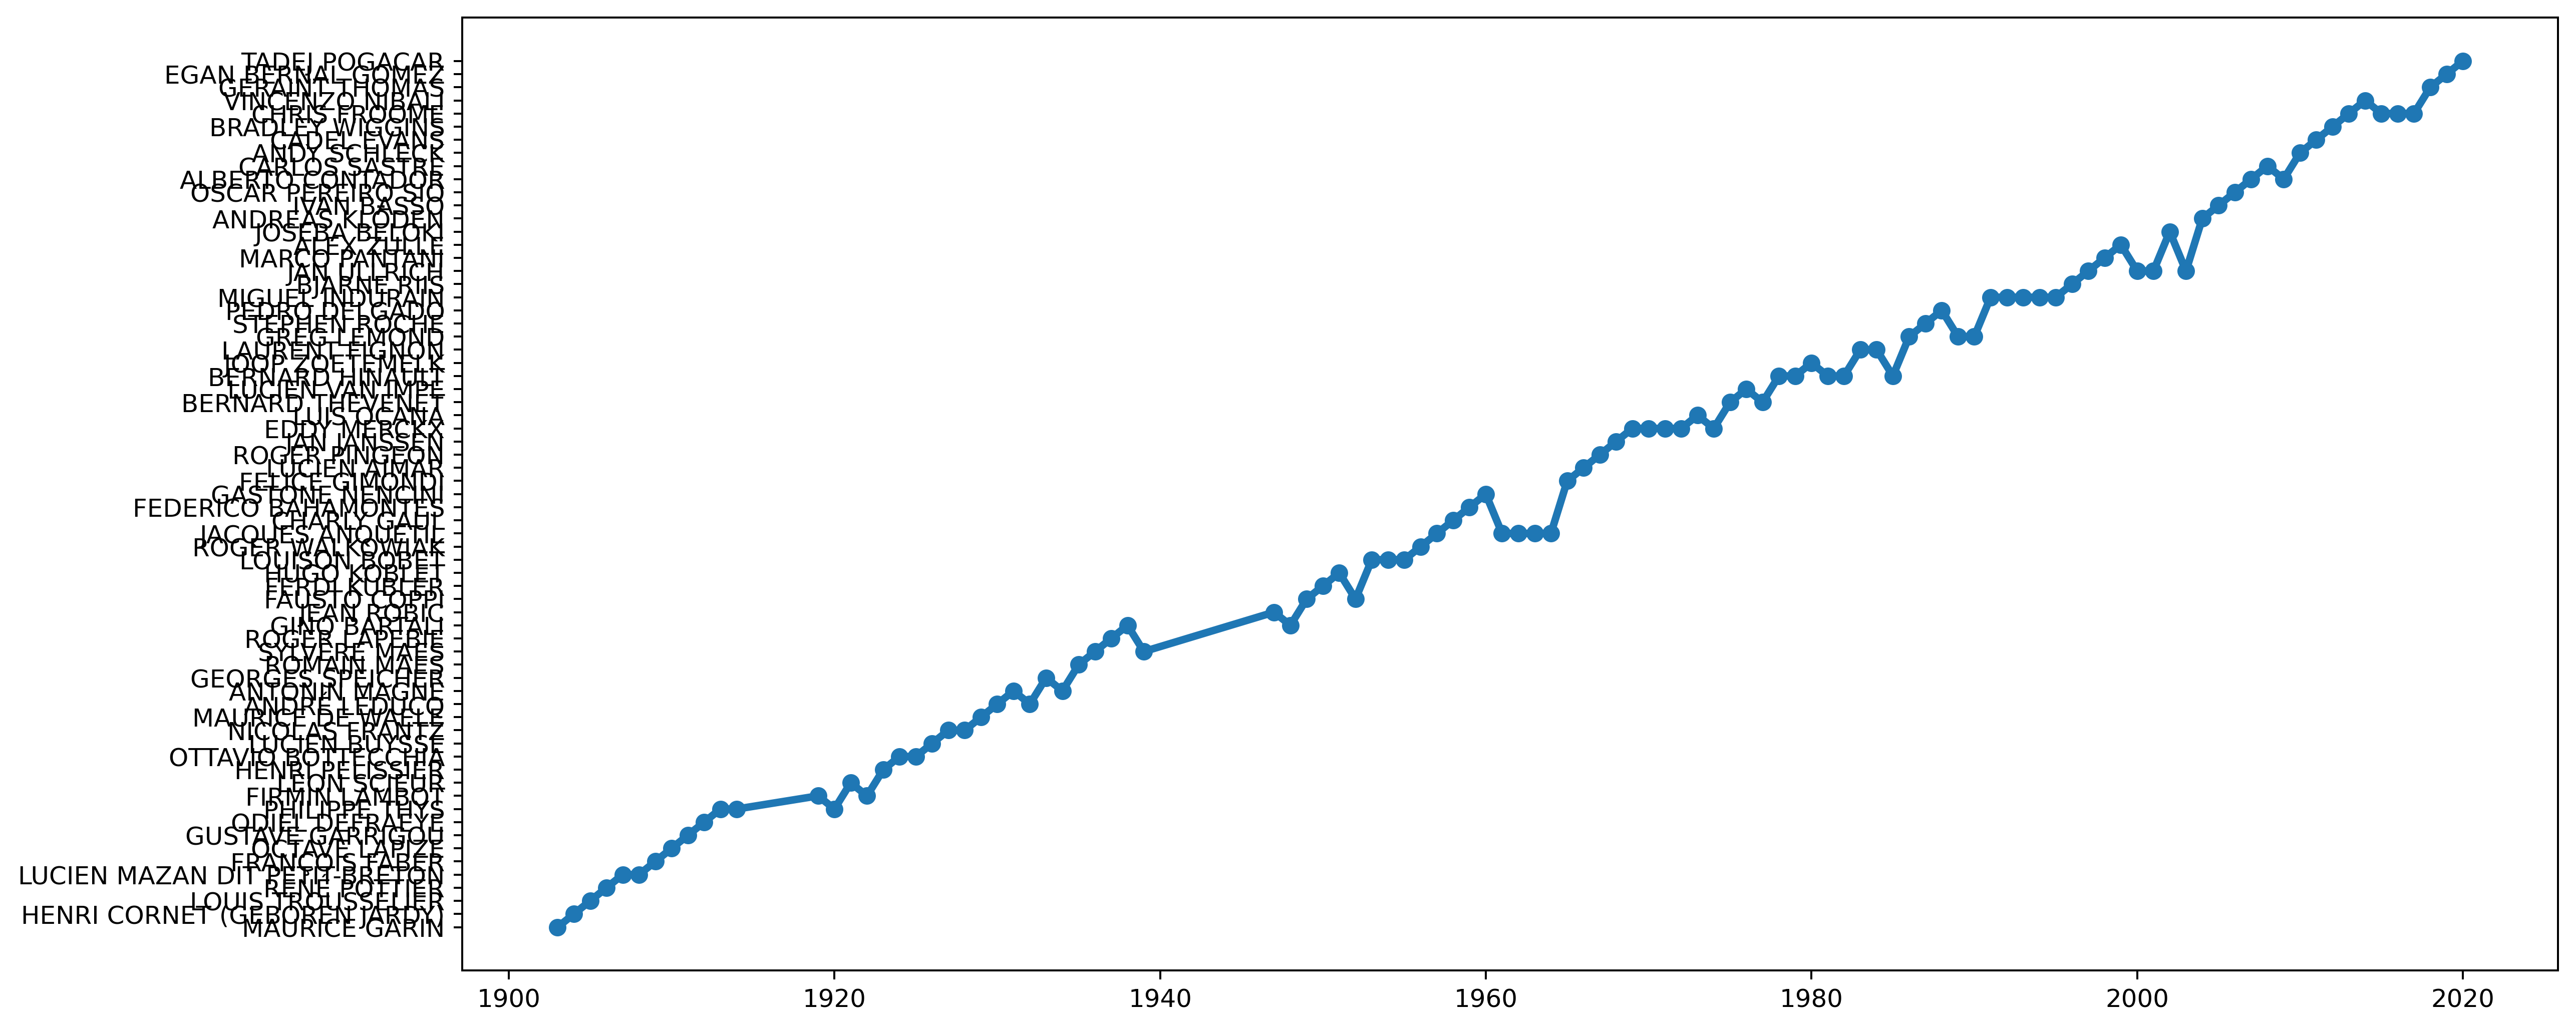

In [7]:
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,winner, "-o",lw=3)
fig.show()

# EXTRA RESOURCES



The below list is a collection of help sites and resources I came across when conducting this analysis

*  Time series mpatlot: https://saralgyaan.com/posts/plot-time-series-in-python-matplotlib-tutorial-chapter-8/
*   More time series: https://unidata.github.io/python-training/workshop/Time_Series/basic-time-series-plotting/
*  Plotting two charts with different scales:  https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
*   Dropping first column of data from a data frame https://thispointer.com/pandas-delete-first-column-of-dataframe-in-python/
*   Getting multiple axes to return a single label https://samchaaa.medium.com/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a











